In [113]:
import requests
import time
import json
import numpy as np
def crawl():
    # 初始 API: https://api.hahow.in/api/courses?limit=12&status=PUBLISHED
    # 接續 API: https://api.hahow.in/api/courses?latestId=54d5a117065a7e0e00725ac0&latestValue=2015-03-27T15:38:27.187Z&limit=30&status=PUBLISHED
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) '
                             'AppleWebKit/537.36 (KHTML, like Gecko) '
                             'Chrome/59.0.3071.115 Safari/537.36'}
    url = 'https://api.hahow.in/api/courses'
    param = '?limit=24&page='
    courses = []
    for page in range(16):
        time.sleep(1.5)
#         if page == 0 :
        resp_courses = requests.get(url + param + str(page),headers = headers).json()
#         else:
#             next_page = requests.get(url + param + str(page),headers = headers).json()
#             resp_courses = resp_courses.update(next_page)
        courses.append(resp_courses)
#     with open('hahow_courses.json' , 'w' , encoding='utf8') as f:
#         json.dump(resp_courses , f , indent = 2 , sort_keys=True , ensure_ascii=False)
    return courses

In [3]:
y = dict()
y = {"_id":"5cad79b0d133060020f44c5e"} #,"owner":{"_id":"5a93c4d418b67a001ee39779","username":"rachel0703","name":"Rachel Chen","profileImageUrl":"https://hahow.in/images/5cb598f2903de500207f8285"}
y['_id']

'5cad79b0d133060020f44c5e'

In [148]:
# 15 * 24
# pd.DataFrame(data[0]['data'][0])
data = crawl()
all_courses = []
items = range(24)
for page in range(15):
    if page == 14:
        items = range(17)
    for item in items:
        author = data[page]['data'][item]['owner']['name']
        propose_time = data[page]['data'][item]['proposalDueTime']
        incubate = data[page]['data'][item]['incubateTime']
        estimate_start = data[page]['data'][item]['estimatedCourseStartTime']
        try:
            startCapi = data[page]['data'][item]['campaign']['startDate']
        except:
            startCapi = np.nan
        types = data[page]['data'][item]['campaign']['types']
        rating = data[page]['data'][item]['numRating']
        avg_rating = data[page]['data'][item]['averageRating']
        isReject =  data[page]['data'][item]['isReject']
        criti_value = data[page]['data'][item]['successCriteria']['numSoldTickets']
        pre_price = data[page]['data'][item]['preOrderedPrice']
        price = data[page]['data'][item]['price']
        reviews = data[page]['data'][item]['reviewing']
        status=  data[page]['data'][item]['status']
        numSoldTickets = data[page]['data'][item]['numSoldTickets']
        title = data[page]['data'][item]['title']
        
        course_data= [title,author , propose_time , incubate ,estimate_start , startCapi,types , rating
        ,avg_rating , isReject , criti_value , pre_price , price ,reviews , status , numSoldTickets
        ]
        
        all_courses.append(course_data)
# pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in data[0]['data'][0].items() ]))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,從姿勢開始：生活人體工學 & 痠痛自救法！,SunGuts 三個字,2019-07-24T16:00:00.000Z,2019-06-25T04:03:19.382Z,2019-09-22T16:00:00.000Z,2019-06-25T04:00:00.000Z,"[PHYSICAL, DIGITAL]",0,0.00,False,30,1600,2200,False,INCUBATING,55
1,手作乾燥花 - 創造植感生活,Irene Hsu,2019-07-19T16:00:00.000Z,2019-06-20T04:00:20.209Z,2019-09-17T16:00:00.000Z,NaN,[],0,0.00,False,30,1200,1800,False,INCUBATING,9
2,一支燈學打光，家裡就是攝影棚,aloke,2019-07-18T16:00:00.000Z,2019-06-19T04:00:20.162Z,2019-09-16T16:00:00.000Z,NaN,[],0,0.00,False,100,1490,1990,False,INCUBATING,54
3,首頁綁架軟體攻防實戰,xtutlab,2019-07-13T16:00:00.000Z,2019-06-14T04:00:59.084Z,2019-09-11T16:00:00.000Z,NaN,[],0,0.00,False,30,499,699,False,INCUBATING,12
4,【影像說書人】攝影不只是按下快門,ANCAJAIER 章潔,2019-07-12T16:00:00.000Z,2019-06-13T04:00:20.216Z,2019-09-10T16:00:00.000Z,NaN,[],0,0.00,False,100,1980,2580,False,INCUBATING,170
5,求職平台大揭秘！寫出讓人資心動的專業履歷,Yourator 新創職涯平台,2019-07-10T16:00:00.000Z,2019-06-11T04:00:06.332Z,2019-09-08T16:00:00.000Z,NaN,[],0,0.00,False,30,1200,1800,False,INCUBATING,57
6,活用深度學習：MT4 交易程式整合視覺模型,Jarvis,2019-07-05T16:00:00.000Z,2019-06-06T04:00:20.542Z,2019-09-03T16:00:00.000Z,NaN,[],0,0.00,False,30,2790,3890,False,INCUBATING,24
7,新手必學的3件事 - 進場點、停損點、停利點,TOZZI,2019-07-04T16:00:00.000Z,2019-06-05T04:00:20.160Z,2019-09-02T16:00:00.000Z,NaN,[],0,0.00,False,30,399,599,False,INCUBATING,23
8,玩轉數據與資料：Excel VBA 入門教學,SAM-LIN,2019-07-03T16:00:00.000Z,2019-06-04T04:00:06.800Z,2019-09-01T16:00:00.000Z,NaN,[],0,0.00,False,30,1490,2790,False,INCUBATING,85
9,產品經理職場學：PM 必修的職涯指南！,Evonne Tsai 蔡伊芳,2019-06-28T16:00:00.000Z,2019-05-30T04:00:20.182Z,2019-07-31T16:00:00.000Z,2019-05-30T04:00:00.000Z,"[PHYSICAL, DIGITAL]",0,0.00,False,30,1399,1888,False,SUCCESS,607


In [150]:
col_names = ['title','author' , 'proposal' , 'incubate', 'estimateStart' , 'startCapital' , 'types' 
            ,'ratings' , 'avg_ratings' , 'isReject' , 'successCriti' , 'prePrice' , 'price'
             ,'review' , 'status', 'solidTickets'
            ]
df = pd.DataFrame(all_courses)
df.columns = col_names
df.to_csv('hahow_courses')
df.head()

,title,author,proposal,incubate,estimateStart,startCapital,types,ratings,avg_ratings,isReject,successCriti,prePrice,price,review,status,solidTickets
0,從姿勢開始：生活人體工學 & 痠痛自救法！,SunGuts 三個字,2019-07-24T16:00:00.000Z,2019-06-25T04:03:19.382Z,2019-09-22T16:00:00.000Z,2019-06-25T04:00:00.000Z,"[PHYSICAL, DIGITAL]",0,0.0,False,30,1600,2200,False,INCUBATING,55
1,手作乾燥花 - 創造植感生活,Irene Hsu,2019-07-19T16:00:00.000Z,2019-06-20T04:00:20.209Z,2019-09-17T16:00:00.000Z,NaN,[],0,0.0,False,30,1200,1800,False,INCUBATING,9
2,一支燈學打光，家裡就是攝影棚,aloke,2019-07-18T16:00:00.000Z,2019-06-19T04:00:20.162Z,2019-09-16T16:00:00.000Z,NaN,[],0,0.0,False,100,1490,1990,False,INCUBATING,54
3,首頁綁架軟體攻防實戰,xtutlab,2019-07-13T16:00:00.000Z,2019-06-14T04:00:59.084Z,2019-09-11T16:00:00.000Z,NaN,[],0,0.0,False,30,499,699,False,INCUBATING,12
4,【影像說書人】攝影不只是按下快門,ANCAJAIER 章潔,2019-07-12T16:00:00.000Z,2019-06-13T04:00:20.216Z,2019-09-10T16:00:00.000Z,NaN,[],0,0.0,False,100,1980,2580,False,INCUBATING,170


In [501]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# 先導入相關套件
import plotly.offline as py
py.init_notebook_mode(connected=True) #為了能在本地端調用
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

In [179]:
df.proposal = pd.to_datetime(df.proposal).apply(lambda x:x.date())
df.incubate= pd.to_datetime(df.incubate).apply(lambda x:x.date())
df.estimateStart = pd.to_datetime(df.estimateStart).apply(lambda x:x.date())
df['have'] = 1

In [186]:
month = df.proposal.apply(lambda x:x.month)
df['pro_month'] = month

In [201]:
data = [go.Scatter(
     x=df.groupby(df.pro_month).have.sum().index,
        y=df.groupby(df.pro_month).have.sum())
         ]


layout = dict(
title = '提案數量分佈'
    )
 
# py.iplot(data)
fig = dict(data=data, layout=layout)
py.iplot(fig)

將提案內容畫出，雖然應該沒什麼關聯，但是莫名地在7月、10月有課程提案的旺季，顯示人們在那些時間或許有比較多的時間準備上課。可以作為 **舉辦大型、中型活動的參考月份。**

/Users/Dennis/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



Text(0.5, 0, '門檻')

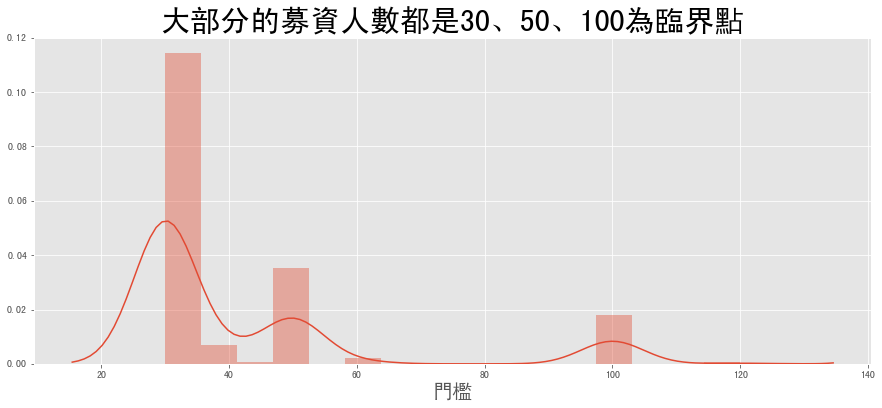

In [210]:
plt.style.use('ggplot')
plt.figure(figsize = (15,6))
sns.distplot(df.successCriti , kde=True)
plt.title('大部分的募資人數都是30、50、100為臨界點' , fontsize= 30)
plt.xlabel('門檻' , fontsize = 20)

可見我們可以以30人為一個小型工作坊人數限制（社團內舉辦），50為中型（社團間合辦），100為大型活動（校際合辦）。

<Figure size 432x288 with 0 Axes>

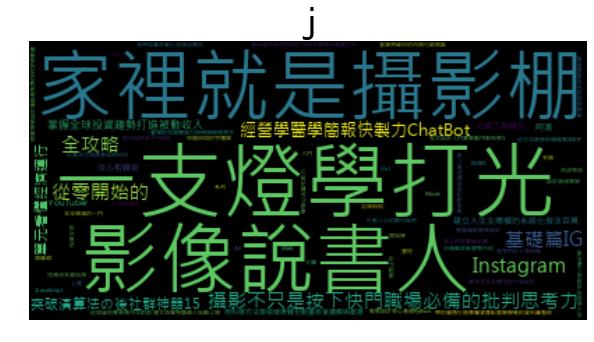

<Figure size 432x288 with 0 Axes>

In [225]:
from wordcloud import WordCloud
import jieba
high_gate_proposal = df[df.successCriti > 90]
title = ''
for name in high_gate_proposal.title:
    title += name
removeword = []
for word in removeword:
    title = title.replace(word , '')

font_path = '/Users/Dennis/Downloads/微软正黑体.ttf'
wordcloud = WordCloud(font_path=font_path).generate(title)
plt.figure( figsize=(10,8), facecolor='k' ,frameon=False)
plt.title('j' , fontsize = 40)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.figure()

In [229]:
df['await'] = df.solidTickets/df.successCriti
df.sort_values('await' , ascending=False).head(20)

,title,author,proposal,incubate,estimateStart,startCapital,types,ratings,avg_ratings,isReject,successCriti,prePrice,price,review,status,solidTickets,have_course,have,pro_month,await
145,用 Python 理財：打造小資族選股策略,FinLab,2018-03-23,2018-02-22,2018-05-22,NaN,[],371,4.98,False,30,1999,3200,False,PUBLISHED,5063,1,1,3,168.766667
286,讓圖不只是好看的－資訊設計思考力！,圖文不符,2016-06-08,2016-05-09,2016-08-07,NaN,[],180,4.56,False,100,990,1800,False,PUBLISHED,13426,1,1,6,134.260000
280,動畫互動網頁程式入門 (HTML/CSS/JS),吳哲宇,2016-07-03,2016-06-03,2016-09-01,NaN,[],241,4.98,False,50,1000,2000,False,PUBLISHED,5547,1,1,7,110.940000
208,從入門到業界實戰 - UI / UX 前端網頁設計,Louis,2017-05-27,2017-04-27,2017-07-11,NaN,[],74,4.85,False,30,650,2500,False,PUBLISHED,2215,1,1,5,73.833333
31,用 Python 理財：打造自己的 AI 股票理專,FinLab,2019-04-18,2019-03-20,2019-06-17,NaN,[],10,5.00,False,30,2499,3999,False,PUBLISHED,2185,1,1,4,72.833333
140,從上手到專業，寫出你想要的文案效果,林育聖,2018-04-04,2018-03-06,2018-05-04,NaN,[],73,4.85,False,30,1280,1680,False,PUBLISHED,2154,1,1,4,71.800000
40,百萬 YouTuber 阿滴－攻心剪輯術！,阿滴 x 圖文不符,2019-03-19,2019-02-18,2019-05-18,2019-02-18T04:00:00.000Z,"[PHYSICAL, DIGITAL]",75,4.88,False,100,1200,1800,False,PUBLISHED,7167,1,1,3,71.670000
246,比ㄅㄆㄇ簡單的韓語發音,王稚鈞,2016-11-05,2016-10-06,2016-11-30,NaN,[],78,5.00,False,50,990,1590,False,PUBLISHED,3402,1,1,11,68.040000
305,AE/MG || 動畫特效 Vol.1,Yan-K,2016-03-24,2016-02-23,2016-04-30,NaN,[],135,4.85,False,50,1000,1500,False,PUBLISHED,3325,1,1,3,66.500000
14,聲入人心-周震宇的人聲必修課,周震宇,2019-06-19,2019-05-21,2019-08-18,2019-05-20T16:00:00.000Z,[DIGITAL],0,0.00,False,30,1680,2680,False,SUCCESS,1726,1,1,6,57.533333


<Figure size 432x288 with 0 Axes>

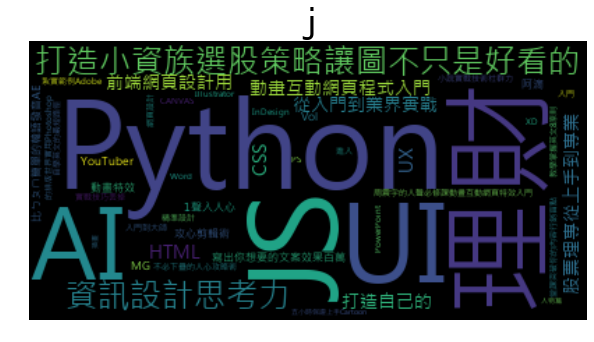

<Figure size 432x288 with 0 Axes>

In [230]:
unicorn = df.sort_values('await' , ascending=False).head(20)
title =  ''
for name in unicorn.title:
    title += name
removeword = []
for word in removeword:
    title = title.replace(word , '')

font_path = '/Users/Dennis/Downloads/微软正黑体.ttf'
wordcloud = WordCloud(font_path=font_path).generate(title)
plt.figure( figsize=(10,8), facecolor='k' ,frameon=False)
plt.title('j' , fontsize = 40)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.figure()

定義預期比率：實際上課人數/需要募資人數

越高的預期比率也意味著：低估該類型課程在市場上的需求度。

可以發現到，人們對程式設計、Adobe系列等

<h3>技術性</h3>

課程非常有興趣，會有很高的期待感。

而設計類型可以推廣為行銷、媒體製作等工作能力，程式有理財、網頁等相應能力

In [241]:
check_start = df[df.status == 'SUCCESS']
check_start['await'] = check_start.successCriti/check_start.solidTickets
check_start.sort_values('solidTickets' , ascending = False).head(5)

,title,author,proposal,incubate,estimateStart,startCapital,types,ratings,avg_ratings,isReject,successCriti,prePrice,price,review,status,solidTickets,have_course,have,pro_month,await
26,15 單元看懂經濟運行，掌握全球投資趨勢,Rachel Chen,2019-05-15,2019-04-16,2019-07-14,2019-04-16T04:00:00.000Z,[DIGITAL],0,0.0,False,100,2490,3600,False,SUCCESS,3170,1,1,5,0.031546
14,聲入人心-周震宇的人聲必修課,周震宇,2019-06-19,2019-05-21,2019-08-18,2019-05-20T16:00:00.000Z,[DIGITAL],0,0.0,False,30,1680,2680,False,SUCCESS,1726,1,1,6,0.017381
13,IG 全攻略：從零開始的 Instagram 經營學,圖文不符,2019-06-20,2019-05-22,2019-08-19,2019-05-22T04:00:00.000Z,[DIGITAL],0,0.0,False,100,1500,1800,False,SUCCESS,1452,1,1,6,0.068871
21,不可錯過的時代趨勢：從自學區塊鏈到專家！,胡耀傑 Jeff X 李婷婷 Tina,2019-05-29,2019-04-30,2019-07-28,NaN,[],0,0.0,False,30,1800,2200,False,SUCCESS,1029,1,1,5,0.029155
12,職場必備的批判思考力：基礎篇,Weihang Lidance Chou,2019-06-21,2019-05-23,2019-07-21,NaN,[],0,0.0,False,100,399,499,False,SUCCESS,984,1,1,6,0.101626


我們可以將剛募資成功的課程找出來，查看目前的修課人數。由於剛募資成功，此時的人報名動機有：

1. 作者行銷手段良好

2. 作者名氣大

3. 非常有興趣

4. 課程安排吸引人

可以看到投資課程的預期非常多，雖說作者本身就是經營投資網站，但仍然驚人，可見多數人出社會後最關心的學問或許是理財，如果要把它與EA作結合，可以用創投的角度說明投資、以及募資的重要性。

*人們對職場、經營自媒體也相當有興趣以及期待。*

In [254]:
#我們來看看有沒有人超喜歡在hahow開課
pd.DataFrame(df.groupby(df.author).have.sum()).sort_values('have',ascending=False).head(15)

,have
author,
藍 國峰,5
Chang Hong Lin,4
圖文不符,4
Rainie Chiang,3
Weihang Lidance Chou,3
李柏鋒,3
Lien Ted,3
聯經出版,3
彭毅弘 Bill,3


顯示其領域應有一批愛好者，也就是為比較安全、有死忠顧客的領域

1. 圖畫電繪
2. 日文教學（語言）
3. 社群/設計（行銷）
4. 瑜珈（健美）
5. 談判、思考
6. 理財
7. 寫App
8. office操作

In [264]:
df.groupby(df.author).solidTickets.sum().nlargest(10)#.sort_values('solidTickets',ascending=False).head()

author
圖文不符         23340
吳哲宇           8287
FinLab        7248
阿滴 x 圖文不符     7167
Yan-K         4631
林育聖           4228
藍 國峰          3835
王稚鈞           3402
彭毅弘 Bill      3306
林協霆           3300
Name: solidTickets, dtype: int64

但是真的越多課越好嗎？我們改用學生人數來看，就會發現並不是如此，有些老師課不多，但是學生更多！

而其中的重疊對象：圖文不符、藍 國峰 所教的

<h3> 行銷 與 電繪 </h3>

或許真正是有濳力的主題！

那麼下一步，就是去看看這些課程大綱：**包含了哪些內容？** 來作為辦理工作坊的參考依據

## 課程評分

/Users/Dennis/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



Text(0.5, 0, '平均評分')

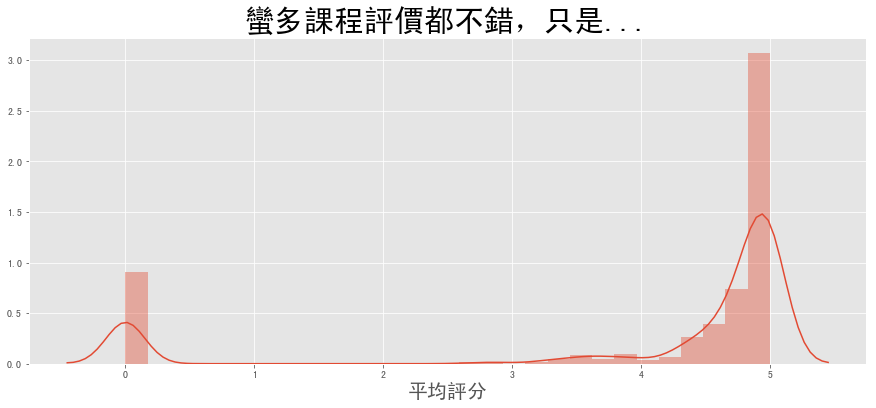

In [273]:
plt.style.use('ggplot')
plt.figure(figsize = (15,6))
sns.distplot(df.avg_ratings , kde=True)
plt.title('蠻多課程評價都不錯，只是...' , fontsize= 30)
plt.xlabel('平均評分' , fontsize = 20)

In [272]:
df[ (df.avg_ratings > 0)& (df.avg_ratings <3)]

,title,author,proposal,incubate,estimateStart,startCapital,types,ratings,avg_ratings,isReject,successCriti,prePrice,price,review,status,solidTickets,have_course,have,pro_month,await
230,Node.js 網站開發 with React.js,yicheng,2017-01-26,2016-12-27,2017-02-25,NaN,[],16,2.75,False,40,1680,1980,False,PUBLISHED,218,1,1,1,5.45
265,Sass － 讓 CSS 變得更簡單有趣,DKMonster,2016-09-14,2016-08-15,2016-11-13,NaN,[],11,2.91,False,50,690,1200,False,PUBLISHED,196,1,1,9,3.92


程式設計相關的課程因為比較硬一點，學生有可能上完了課程學不太到什麼東西。
查看評論了解原因之後，可以歸納出幾個雷區：

1. 不要用過於基礎、網路上就能查到的資料來上課

2. 內容枯燥，技術性的課程只講技術很容易流於無趣，老師需要多帶一點個人、實務經驗

3. 缺乏對學生背景認知，跳太快，過於進階就不太適合。

# 那麼評價風氣如何？

count    353.000000
mean      27.458924
std       39.214288
min        0.000000
25%        5.000000
50%       13.000000
75%       33.000000
max      371.000000
Name: ratings, dtype: float64


/Users/Dennis/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



Text(0.5, 0, '平均評分')

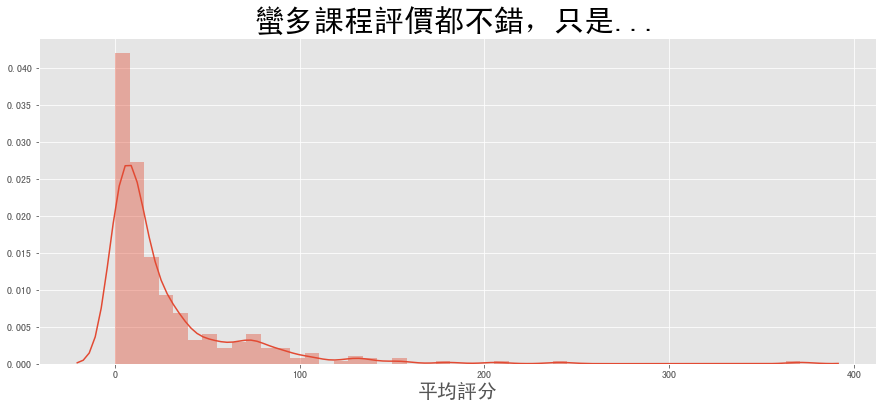

In [275]:
plt.style.use('ggplot')
print(df.ratings.describe())
plt.figure(figsize = (15,6))
sns.distplot(df.ratings , kde=True)
plt.title('蠻多課程評價都不錯，只是...' , fontsize= 30)
plt.xlabel('平均評分' , fontsize = 20)

平均大抵上在10則留言左右，但是有些課程學生很樂於給評價與回饋，表示這是一門很有互動性的課程

In [280]:
df[df.ratings > 100].sort_values('avg_ratings' , ascending = False)

,title,author,proposal,incubate,estimateStart,startCapital,types,ratings,avg_ratings,isReject,successCriti,prePrice,price,review,status,solidTickets,have_course,have,pro_month,await
174,打動人心的創作秘密，畫出個性的角色設計,水晶孔,2017-10-25,2017-09-26,2017-11-30,NaN,[],156,4.99,False,100,880,1280,False,PUBLISHED,3158,1,1,10,31.580000
145,用 Python 理財：打造小資族選股策略,FinLab,2018-03-23,2018-02-22,2018-05-22,NaN,[],371,4.98,False,30,1999,3200,False,PUBLISHED,5063,1,1,3,168.766667
280,動畫互動網頁程式入門 (HTML/CSS/JS),吳哲宇,2016-07-03,2016-06-03,2016-09-01,NaN,[],241,4.98,False,50,1000,2000,False,PUBLISHED,5547,1,1,7,110.940000
172,小資族理財的第一堂入門課,李柏鋒,2017-10-31,2017-10-02,2017-12-30,NaN,[],206,4.97,False,60,888,1688,False,PUBLISHED,1550,1,1,10,25.833333
181,當個水彩甜點師 — 雪莉的午茶繪畫課,Sherry雪莉,2017-09-27,2017-08-29,2017-11-26,NaN,[],128,4.97,False,30,880,1200,False,PUBLISHED,1077,1,1,9,35.900000
295,Cartoon 插畫 - 人物篇 (●—●),JUN CHIU,2016-05-09,2016-04-09,2016-07-08,NaN,[],128,4.97,False,30,300,500,False,PUBLISHED,1336,1,1,5,44.533333
143,240 分鐘 - 忘掉拍照，學會攝影,子雍 Tzu-Yung,2018-03-28,2018-02-27,2018-05-27,NaN,[],139,4.96,False,120,1490,2049,False,PUBLISHED,2296,1,1,3,19.133333
171,社群力：30 堂課突破你的內容行銷盲點！,圖文不符,2017-11-15,2017-10-17,2018-01-14,NaN,[],110,4.95,False,100,1880,2400,False,PUBLISHED,5294,1,1,11,52.940000
154,台科 EMBA 年年爆滿的一門 Word 課（A系列）,Tina Wu,2018-01-18,2017-12-20,2018-03-19,NaN,[],105,4.93,False,30,550,950,False,PUBLISHED,991,1,1,1,33.033333
318,旅行中手繪建築插畫，你也可以！,Peichi Wu,2016-01-07,2015-12-08,2016-02-06,NaN,[],106,4.90,False,35,400,500,False,PUBLISHED,886,1,1,1,25.314286


這裡我們可以發現

1. 簡單/手寫 （手繪、插畫、水彩甜點、寫字）
2. 設計（社群行銷、資訊設計、Adobe）
3. 理財（Python、小資）

是互動非常好的課程，表示學生上完課之後有許多收穫，但是還不只如此。
諸多評價給誰看的？其實就是想上這門課的同學、外人。
表示這些主題、內容、講者會是 **容易被推薦的對象**


也就是說，如果想快速發展一個平台、知名度，平台上的**課程主題以上面三個為主應該是個不錯的策略。**

因為上得好的話，有很高機率修課同學也會推薦給別人，可以快速傳播。我們也可以參考熱門課程的課程架構來思考工作坊的內容安排。

In [281]:
df[df.solidTickets > 5000]

,title,author,proposal,incubate,estimateStart,startCapital,types,ratings,avg_ratings,isReject,successCriti,prePrice,price,review,status,solidTickets,have_course,have,pro_month,await
40,百萬 YouTuber 阿滴－攻心剪輯術！,阿滴 x 圖文不符,2019-03-19,2019-02-18,2019-05-18,2019-02-18T04:00:00.000Z,"[PHYSICAL, DIGITAL]",75,4.88,False,100,1200,1800,False,PUBLISHED,7167,1,1,3,71.670000
145,用 Python 理財：打造小資族選股策略,FinLab,2018-03-23,2018-02-22,2018-05-22,NaN,[],371,4.98,False,30,1999,3200,False,PUBLISHED,5063,1,1,3,168.766667
171,社群力：30 堂課突破你的內容行銷盲點！,圖文不符,2017-11-15,2017-10-17,2018-01-14,NaN,[],110,4.95,False,100,1880,2400,False,PUBLISHED,5294,1,1,11,52.940000
280,動畫互動網頁程式入門 (HTML/CSS/JS),吳哲宇,2016-07-03,2016-06-03,2016-09-01,NaN,[],241,4.98,False,50,1000,2000,False,PUBLISHED,5547,1,1,7,110.940000
286,讓圖不只是好看的－資訊設計思考力！,圖文不符,2016-06-08,2016-05-09,2016-08-07,NaN,[],180,4.56,False,100,990,1800,False,PUBLISHED,13426,1,1,6,134.260000


比對評分項目與修課人數，或許真的有傳播效應！也就是課程人數這麼多，可以猜測有相互推薦的因素。
但是更合理的是，修課人數越多，當然評價越多囉，比如：

修課人數與評價與相關係數為：
 0.6535412156148218


Text(0.5, 0, '修課人數')

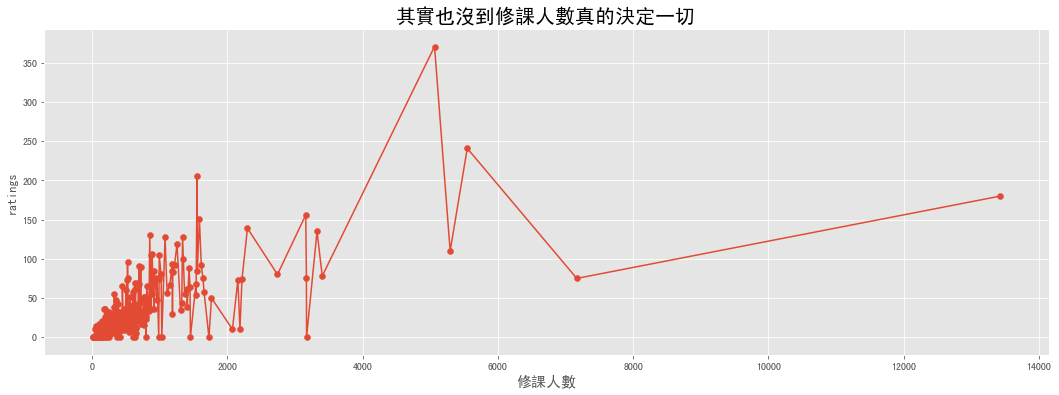

In [301]:
plt.figure(figsize = (18,6))
print('修課人數與評價與相關係數為：\n' ,np.corrcoef(df.solidTickets , df.ratings)[1,0])
sns.lineplot(df.solidTickets , df.ratings )
plt.scatter(df.solidTickets , df.ratings)
plt.title('其實也沒到修課人數真的決定一切' , fontsize = 20)
plt.xlabel('修課人數' , fontsize =15)

In [284]:
df['feedback_ratio'] = df.ratings / df.solidTickets
df.sort_values('feedback_ratio' , ascending = False).head()

,title,author,proposal,incubate,estimateStart,startCapital,types,ratings,avg_ratings,isReject,...,prePrice,price,review,status,solidTickets,have_course,have,pro_month,await,feedback_ratio
335,火箭發射飛行中 Rocket 1,Rainie Chiang,2015-08-23,2015-07-24,2015-08-24,NaN,[],14,4.71,False,...,250,1200,False,PUBLISHED,53,1,1,8,1.766667,0.264151
334,火箭飛船遊太空 Rocket 2,Rainie Chiang,2015-08-23,2015-07-24,2015-08-24,NaN,[],10,5.00,False,...,250,1200,False,PUBLISHED,45,1,1,8,1.500000,0.222222
151,【不會畫圖】也能學會動態LINE貼圖製作,阿狗阿貓,2018-02-16,2018-01-18,2018-04-17,NaN,[],36,4.97,False,...,988,1488,False,PUBLISHED,169,1,1,2,5.633333,0.213018
336,火箭準備起飛了 Yoga Basics,Rainie Chiang,2015-08-23,2015-07-24,2015-08-24,NaN,[],11,5.00,False,...,250,1200,False,PUBLISHED,56,1,1,8,1.866667,0.196429
352,幾何圖形分割 X 色塊組合,Jafy Su,2015-03-13,2015-03-27,2015-03-13,NaN,[],36,4.92,False,...,50,100,False,PUBLISHED,192,1,1,3,6.400000,0.187500


意外發現，瑜珈系列的評價比例是最高的。基本上每四個人就會有一個人給予老師回饋！不過修課人數很少，所以結果看看就好。

count     353.000000
mean     1044.892351
std       666.798819
min        50.000000
25%       500.000000
50%       990.000000
75%      1490.000000
max      4800.000000
Name: prePrice, dtype: float64


/Users/Dennis/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



Text(0.5, 0, '預購價格')

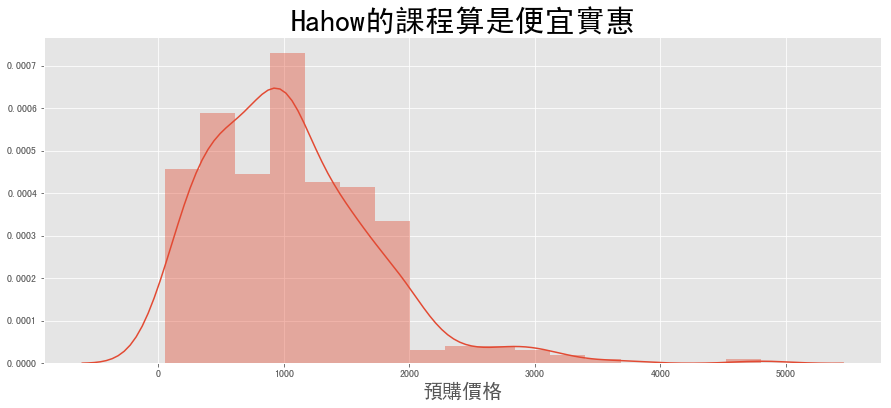

In [303]:
plt.style.use('ggplot')
print(df.prePrice.describe())
plt.figure(figsize = (15,6))
sns.distplot(df.prePrice , kde=True)
plt.title('Hahow的課程算是便宜實惠' , fontsize= 30)
plt.xlabel('預購價格' , fontsize = 20)

count     353.000000
mean     1577.654391
std       948.919325
min       100.000000
25%       899.000000
50%      1500.000000
75%      2000.000000
max      7680.000000
Name: price, dtype: float64


/Users/Dennis/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



Text(0.5, 0, '實際價格')

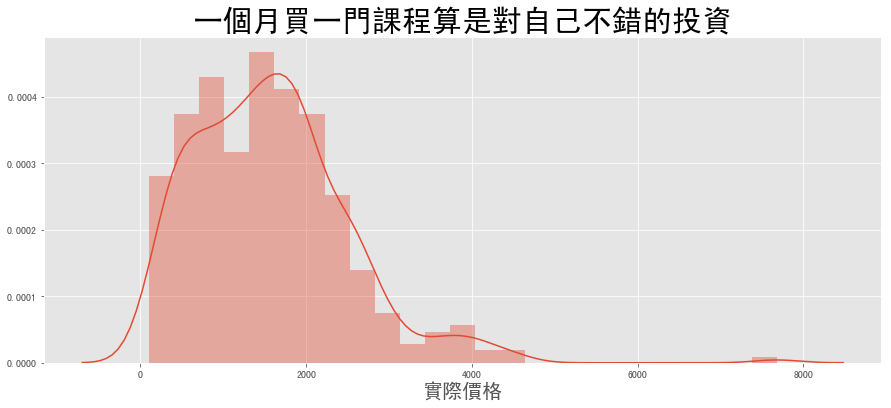

In [305]:
plt.style.use('ggplot')
print(df.price.describe())
plt.figure(figsize = (15,6))
sns.distplot(df.price , kde=True)
plt.title('一個月買一門課程算是對自己不錯的投資' , fontsize= 30)
plt.xlabel('實際價格' , fontsize = 20)

所以這邊我們可以看到，講師的行情其實可以來一次定為1500~2000左右

Text(0.5, 1.0, 'Hahow的課程數穩定上升')

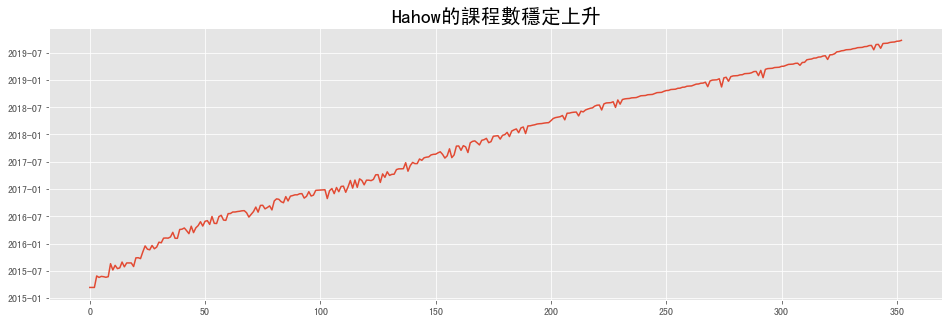

In [347]:
plt.figure(figsize= (16,5))
df.estimateStart  = pd.to_datetime(df.estimateStart)
esr = df.estimateStart.sort_index(ascending = False).reset_index()
esr.estimateStart.plot()
plt.title('Hahow的課程數穩定上升' , fontsize = 20)

In [357]:
df.sort_values('ratings' , ascending = False).head()

,title,author,proposal,incubate,estimateStart,startCapital,types,ratings,avg_ratings,isReject,...,prePrice,price,review,status,solidTickets,have_course,have,pro_month,await,feedback_ratio
145,用 Python 理財：打造小資族選股策略,FinLab,2018-03-23,2018-02-22,2018-05-22,NaN,[],371,4.98,False,...,1999,3200,False,PUBLISHED,5063,1,1,3,168.766667,0.073277
280,動畫互動網頁程式入門 (HTML/CSS/JS),吳哲宇,2016-07-03,2016-06-03,2016-09-01,NaN,[],241,4.98,False,...,1000,2000,False,PUBLISHED,5547,1,1,7,110.940000,0.043447
172,小資族理財的第一堂入門課,李柏鋒,2017-10-31,2017-10-02,2017-12-30,NaN,[],206,4.97,False,...,888,1688,False,PUBLISHED,1550,1,1,10,25.833333,0.132903
286,讓圖不只是好看的－資訊設計思考力！,圖文不符,2016-06-08,2016-05-09,2016-08-07,NaN,[],180,4.56,False,...,990,1800,False,PUBLISHED,13426,1,1,6,134.260000,0.013407
174,打動人心的創作秘密，畫出個性的角色設計,水晶孔,2017-10-25,2017-09-26,2017-11-30,NaN,[],156,4.99,False,...,880,1280,False,PUBLISHED,3158,1,1,10,31.580000,0.049398


In [366]:
bins_names = ['naive' , 'low' , 'medium' , 'high' , 'very_high']
df['price_level'] = pd.qcut(df.price , 5,bins_names)
df.price_level.unique()

[high, medium, naive, very_high, low]
Categories (5, object): [naive < low < medium < high < very_high]

Text(0.5, 0, '課程價位')

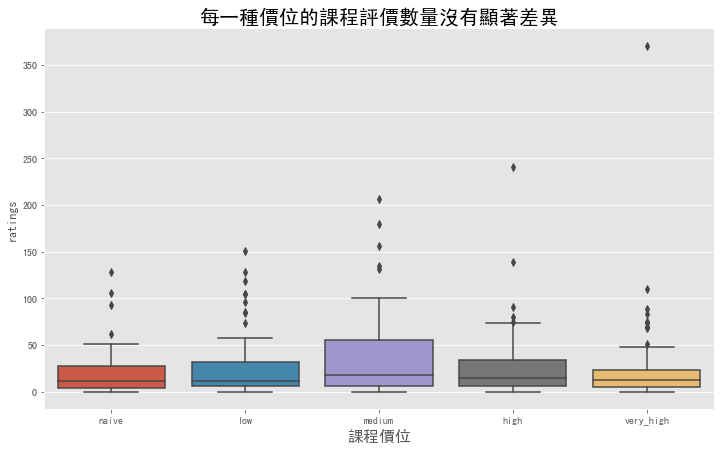

In [374]:
plt.figure(figsize = (12, 7))
sns.boxplot(df.price_level , df.ratings)
plt.title('每一種價位的課程評價數量沒有顯著差異' , fontsize = 20)
plt.xlabel('課程價位' , fontsize = 16)

Text(0.5, 0, '課程價位')

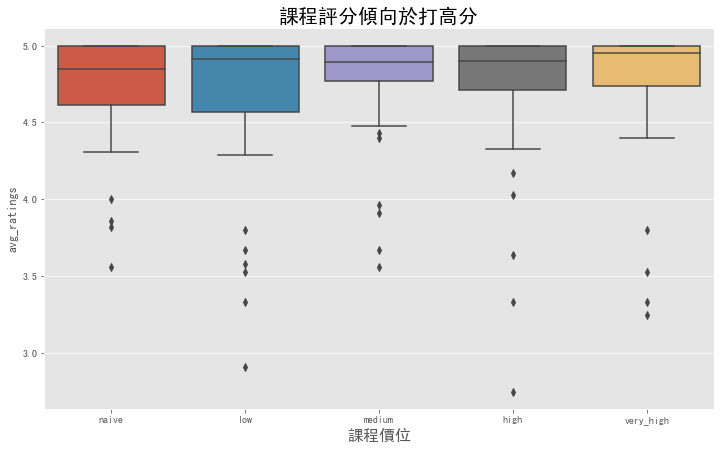

In [382]:
plt.style.use('ggplot')
plt.figure(figsize = (12, 7))
sns.boxplot(df.price_level[df.avg_ratings >0] , df.avg_ratings[df.avg_ratings > 0])
plt.title('課程評分傾向於打高分' , fontsize = 20)
plt.xlabel('課程價位' , fontsize = 16)

<h2>越貴，期待越高，失望越大？</h2>

有趣的是，免費的課程評分通常不會低於3.5，但是比較貴的課程還是會有人打低分，顯示大家對昂貴的課程有比較高的要求。

# 收益與商業分析

In [384]:
df['revenue'] = df.solidTickets * ((df.prePrice + df.price)/2)
df.sort_values('revenue' , ascending = False).head()

,title,author,proposal,incubate,estimateStart,startCapital,types,ratings,avg_ratings,isReject,...,review,status,solidTickets,have_course,have,pro_month,await,feedback_ratio,price_level,revenue
286,讓圖不只是好看的－資訊設計思考力！,圖文不符,2016-06-08,2016-05-09,2016-08-07,NaN,[],180,4.56,False,...,False,PUBLISHED,13426,1,1,6,134.260000,0.013407,medium,18729270.0
145,用 Python 理財：打造小資族選股策略,FinLab,2018-03-23,2018-02-22,2018-05-22,NaN,[],371,4.98,False,...,False,PUBLISHED,5063,1,1,3,168.766667,0.073277,very_high,13161268.5
171,社群力：30 堂課突破你的內容行銷盲點！,圖文不符,2017-11-15,2017-10-17,2018-01-14,NaN,[],110,4.95,False,...,False,PUBLISHED,5294,1,1,11,52.940000,0.020778,very_high,11329160.0
40,百萬 YouTuber 阿滴－攻心剪輯術！,阿滴 x 圖文不符,2019-03-19,2019-02-18,2019-05-18,2019-02-18T04:00:00.000Z,"[PHYSICAL, DIGITAL]",75,4.88,False,...,False,PUBLISHED,7167,1,1,3,71.670000,0.010465,medium,10750500.0
26,15 單元看懂經濟運行，掌握全球投資趨勢,Rachel Chen,2019-05-15,2019-04-16,2019-07-14,2019-04-16T04:00:00.000Z,[DIGITAL],0,0.00,False,...,False,SUCCESS,3170,1,1,5,31.700000,0.000000,very_high,9652650.0


收益越高，代表許多人 **願意付錢上課的程度越高**。

這樣有什麼含義呢？我們可以推測**這些課程的稀有性比較高，而且有廣大的市場**，網路那麼發達，是靠免費資源、書籍也比較難學習到的。

或許平台可以多聯繫這樣子的專家來開課，藉此創造更高收益

圖文不符真的很賺，單它這個團隊就佔了前五名中的60%，M平方的投資課程也很了不起，不只促銷做得好，是前五名中唯一一堂還沒有正式開課，就累積3000多名學生的課程。而且上面的定價我是粗估使用預購價格、正式價格來平均算出來的課程價格，因為M平方是一個還在備課的課程，許多人都是透過「預購」買入的，倘若在過幾年，M平方或許會上升其在hahow的收益貢獻排名，是非常有濳力的平台講師。

<h3>主題非常明確，資訊、理財、自媒體</h3>

1. 資訊設計、圖表
2. 理財、投資
3. 社群自媒體經營

以此為出發，這些主題我認為可以舉辦**大型工作坊、講座、甚至為期兩天也無不可** 因為市場廣大，所以可以擴大工作坊的規模。

Text(0.5, 0, '替平台創造營收')

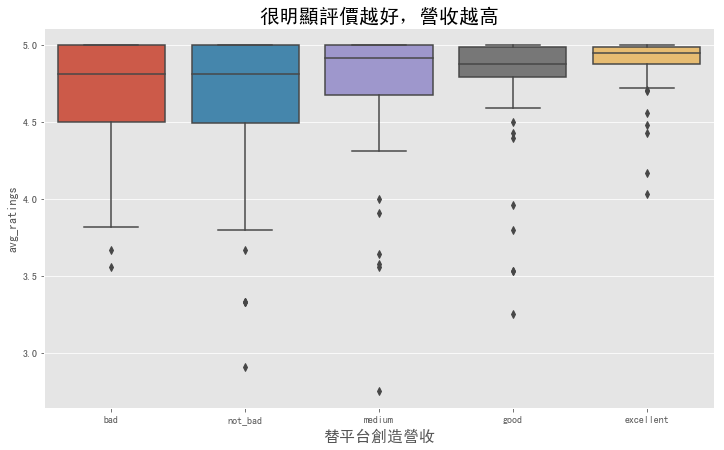

In [398]:
#將營收貢獻分類
bins_names = ['bad' , 'not_bad' , 'medium' , 'good' , 'excellent']
df.revenue = df.revenue.astype(int)
df ['revenue_level'] = pd.qcut(df.revenue , 5,bins_names)
plt.style.use('ggplot')
plt.figure(figsize = (12, 7))
sns.boxplot(df.revenue_level[df.avg_ratings > 0] , df.avg_ratings[df.avg_ratings > 0])
plt.title('很明顯評價越好，營收越高' , fontsize = 20)
plt.xlabel('替平台創造營收' , fontsize = 16)

Text(0.5, 0, '替平台創造營收')

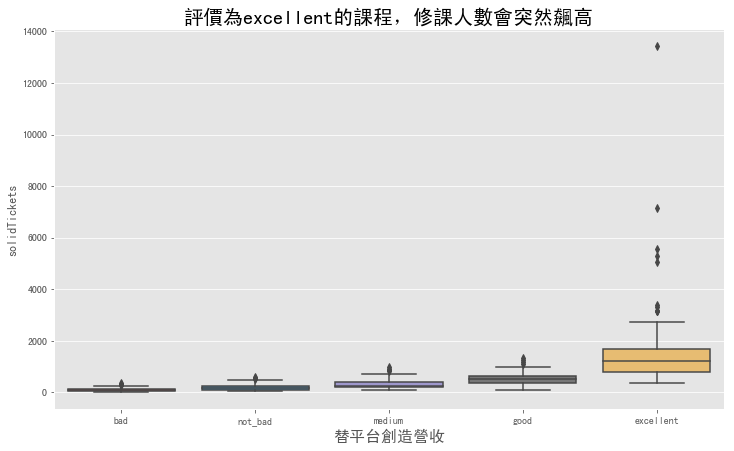

In [400]:
plt.style.use('ggplot')
plt.figure(figsize = (12, 7))
sns.boxplot(df.revenue_level , df.solidTickets)
plt.title('評價為excellent的課程，修課人數會突然飆高' , fontsize = 20)
plt.xlabel('替平台創造營收' , fontsize = 16)

Text(0.5, 0, '替平台創造營收')

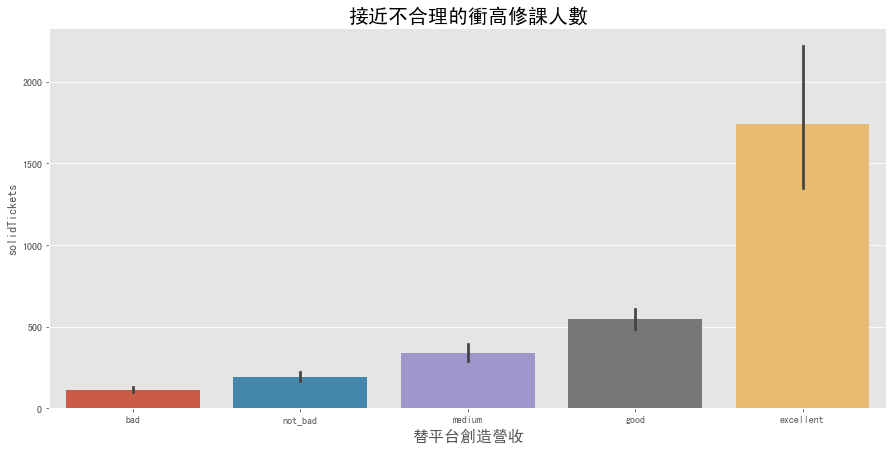

In [413]:
plt.figure(figsize = (15, 7))
plt.title('接近不合理的衝高修課人數' , fontsize = 20)
sns.barplot(df.revenue_level , df.solidTickets)
plt.xlabel('替平台創造營收' , fontsize = 16)

我們可以發現，越受好評的課程通常就是那些創造營收的課程。顯示評分頗具修課的參考價值。另外到了excellent等級的課程修課人數會突然增加許多，所以如果要增加平台營收，可以替good課程做促銷，更有效率成長營收。

由於數據是右偏斜，我們先取對數，之後再轉換回來！

excellent門檻目前為： 1050160.0 元


/Users/Dennis/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



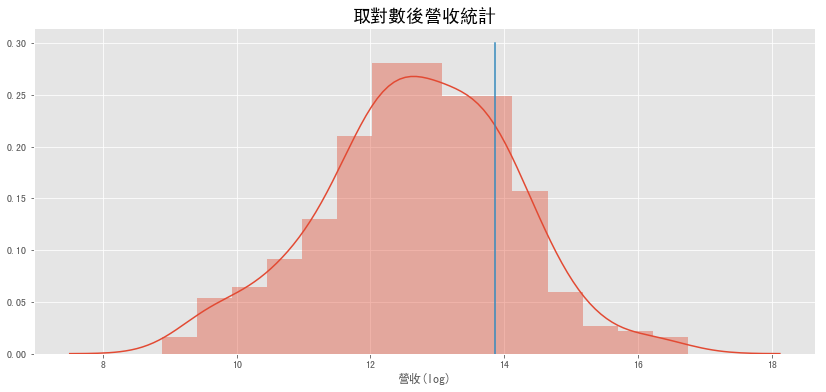

In [458]:
gate = np.log(pd.qcut(df.revenue ,5).unique()[4].left)
plt.figure(figsize = (14,6))
sns.distplot(np.log(df.revenue))
plt.plot([gate , gate] , [0 , 0.3])
plt.title('取對數後營收統計' ,fontsize = 18)
plt.xlabel('營收(log)')
print('excellent門檻目前為：' ,np.exp(gate),'元')

# 那麼價位跟修課人數的流量關係呢？

Text(0.5, 0, '課程價位')

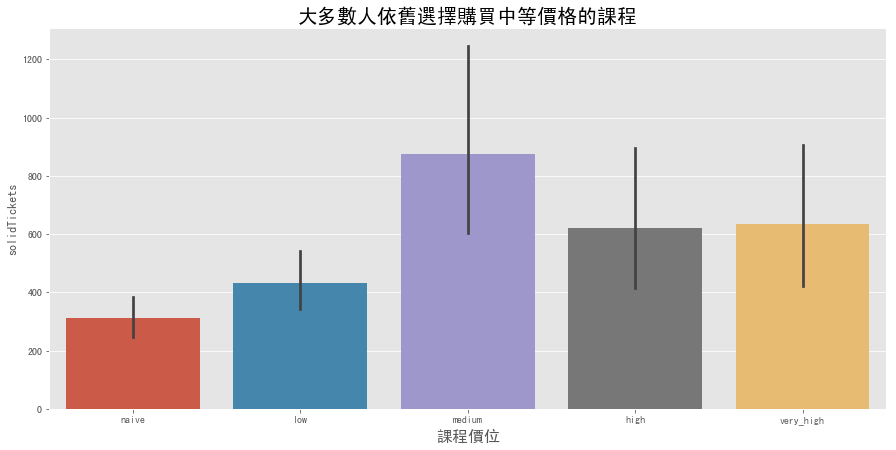

In [461]:
plt.figure(figsize = (15, 7))
plt.title('大多數人依舊選擇購買中等價格的課程' , fontsize = 20)
sns.barplot(df.price_level , df.solidTickets)
plt.xlabel('課程價位' , fontsize = 16)

<h1>所以要促銷的手段策略有二，專注在調整high等級的courses：<h1>


<h3> 1.對於修課人數已經非常多的人，可以考慮在之後的課程提高其課程售價</h3>

因為high、very_high的課程流量差不多，**顯示在這個等級價格應該不是問題。**在上面我們提到要將good營收提升到excellent，所以這裏可以選擇提高部分流量高的課程售價。

<h3>2.對於修課人數還不高的人，其實應該是流量 > 價格</h3>
    
也就是多發放coupon，與其他品牌合作來累積紅利、折扣點數。，我們可以選擇降低high的價格，把這些課程的售價利用coupon、抽獎等手段調整為medium，因為這個價格會比起high帶來更多流量，同樣也能讓good提升到excellent



# 需要多少流量、提升多少價格、降低多少價格都可以再量化！

In [473]:
high = df[df.price_level == 'high']
med = df[df.price_level == 'medium']
very_high = df[df.price_level == 'very_high']
print('高價平均價格：' , int(np.mean(high.price)))
print('中等平均價格：',int(np.mean(med.price)))
print('超高平均價格：' , int(np.mean(very_high.price)))

高價平均價格： 2020
中等平均價格： 1582
超高平均價格： 2996


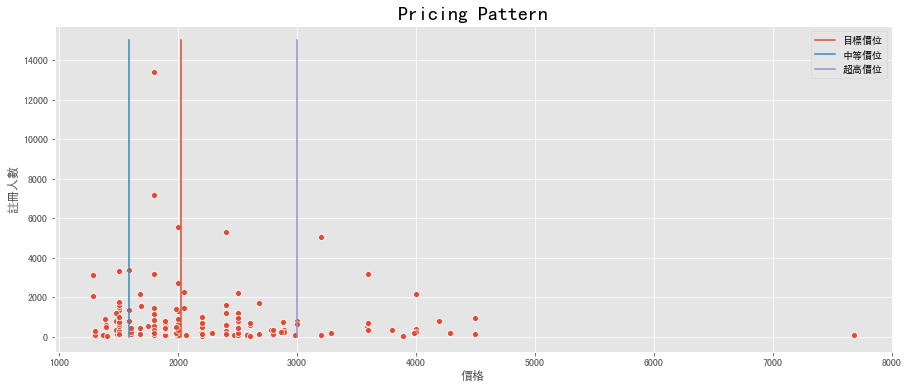

In [595]:
total_price = high.price.tolist() + med.price.tolist()+ very_high.price.tolist()
total_name = high.title.tolist() + med.title.tolist()+ very_high.title.tolist()
total_stream = high.solidTickets.tolist() + med.solidTickets.tolist()+ very_high.solidTickets.tolist()
total_revenue = high.revenue.tolist() + med.revenue.tolist() + very_high.revenue.tolist()
plt.figure(figsize = (15, 6))
sns.scatterplot(total_price,total_stream)
plt.title('Pricing Pattern' , fontsize = 20) 
plt.xlabel('價格')
plt.ylabel('註冊人數')
plt.plot([int(np.mean(high.price)) ,int(np.mean(high.price))] , [0,15000] , label = '目標價位')
plt.plot([int(np.mean(med.price)), int(np.mean(med.price))] , [0,15000] ,label = '中等價位')
# plt.fill_betweenx(y = 10000,x1 = int(np.mean(high.price)),x2 = int(np.mean(med.price)))
plt.plot([int(np.mean(very_high.price)), int(np.mean(very_high.price))] , [0,15000] , label = '超高價位')
plt.legend()

只要把藍紅線之間的課程推到藍線，紅紫線之間的課程推到紫色線，應該可以有效提升營收！
我們可以用plotly來讓資料視覺化更清楚，了解是哪一門課程在這個價位與註冊人數。

In [572]:
len(list(range(int(np.mean(total_stream)))))

736

In [586]:
# Create a trace
trace1 = go.Scatter(
    x = np.asarray(total_price),
    y = np.asarray(total_stream),
    text = total_name,
    mode = 'markers' , 
    name = '品牌'
)

shapes = list()
# for i in (20, 40, 60):
shapes.append({'type': 'line',
               'xref': 'x',
               'yref': 'y',
               'x0': 10,
               'y0': 0,
               'x1': 10,
               'y1': 1})
data = list(range(8000))#list(range(int(np.mean(total_stream))))
# trace2 = go.Scatter(
#      x=list(range(len(data))),
#     y=[7800] * len(data), name = '情感分數線', 
#     mode='lines'
# )

shapes = list()
shapes.append({'type': 'line',
                   'xref': 'x',
                   'yref': 'y',
                   'x0':int(np.mean(high.price)) ,
                   'y0': 0,
                   'x1':int(np.mean(high.price)),
                   'y1': 15000,} 
             )
shapes.append(
{'type': 'line',
                   'xref': 'x',
                   'yref': 'y',
                   'x0':int(np.mean(med.price)) ,
                   'y0': 0,
                   'x1':int(np.mean(med.price)),
                   'y1': 15000,
  'line':{
                'color': 'rgb(128, 0, 128)',
                'width': 4,
                'dash': 'dot',
            }


}   )

shapes.append(
{'type': 'line',
                   'xref': 'x',
                   'yref': 'y',
                   'x0':int(np.mean(very_high.price)) ,
                   'y0': 0,
                   'x1':int(np.mean(very_high.price)),
                   'y1': 15000,
  'line':{
                'color': 'rgba(50, 171, 96, 0.7)',
                'width': 4,
                'dash': 'dot',
            }

    }   
)



layout = go.Layout(shapes=shapes , title= '課程訂價區分' , xaxis=dict(title = '課程價格') , yaxis = dict(title = '註冊人數'))



fig = go.Figure(data=[trace1] ,layout=layout )
# Plot and embed in ipython notebook!
py.iplot(fig)

# or plot with: plot_url = py.plot(data, filename='basic-line')

In [604]:

trace1 = go.Scatter3d(
   x = np.asarray(total_price),
    y=np.asarray(total_stream),
    z=np.asarray(total_revenue),
    mode='markers',
    marker=dict(
        size=12,
        color=z,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    ),
    text  = total_name
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ), scene = dict(xaxis=dict(title = '課程價格') , yaxis = dict(title = '註冊人數'),
    zaxis = dict(title = '貢獻收益')) , title = '課程性質分佈'
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

# 那麼可以創造多少收益呢？

In [554]:
#應該降低價格的課程
bring_stream = high[high.solidTickets < med.solidTickets.mean()]
#應該提升價格的課程
bring_money = high[high.price >  very_high.solidTickets.mean()]

#創造流量
create_str_revenue = ((med.solidTickets.mean() - bring_stream.solidTickets)*bring_stream.price).sum()

#提升價格
create_price_revenue = ((very_high.price.mean() - bring_money.price)*bring_money.solidTickets).sum()
print('提升流量預估可以帶來收益：',int(create_str_revenue))
print('提升價格預估可以帶來收益：',create_price_revenue)
increase_sum = int(create_str_revenue) + int(create_price_revenue)
print('提升平台總收益 :',increase_sum)
print('大約為提升了', round(increase_sum/df.revenue.sum() , 3)*100,'%')

提升流量預估可以帶來收益： 46962373
提升價格預估可以帶來收益： 31099830.0
提升平台總收益 : 78062203
大約為提升了 25.8 %


Text(0, 0.5, '累積營收')

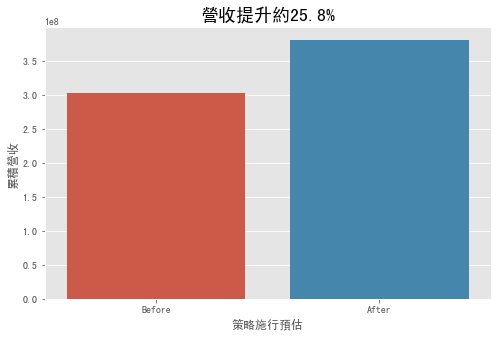

In [562]:
plt.figure(figsize = (8,5))
plt.title('營收提升約' + str(round(increase_sum/df.revenue.sum() , 3)*100) + '%' ,fontsize = 18)
sns.barplot( ['Before', 'After'], [df.revenue.sum(),df.revenue.sum() + increase_sum ])
plt.xlabel('策略施行預估')
plt.ylabel('累積營收')

預估成果非常驚人，足足提升了25%的營收。

這樣的數字以0050 ETF的報酬率比較，是臺灣股票市場裡，市場投資組合報酬率的3倍之多。

當然這邊只是很粗步的估算，少考慮了許多課程本身（上課時間、老師名氣、教材紮實程度等質化資料）的資料，但是倘若我們是Hahow的資料分析師，這樣的檢驗可以在開會時提出，與其他夥伴共同討論。